In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib notebook

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


<IPython.core.display.Javascript object>


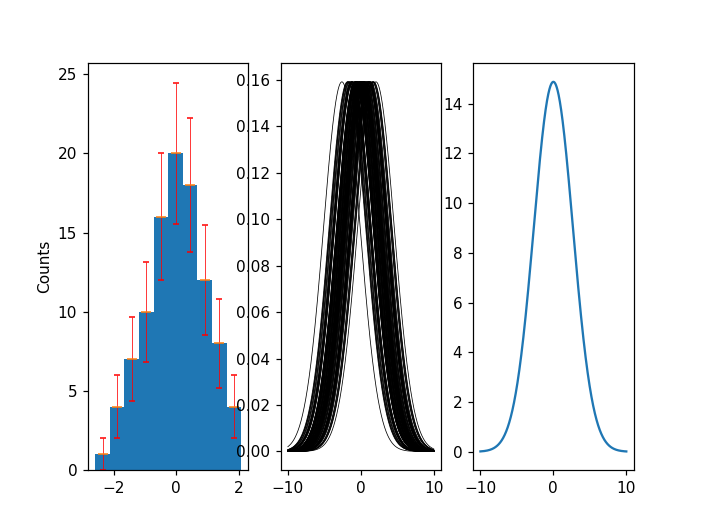

In [2]:
xsize=100
x=np.random.normal(size=(xsize,))
fig, ax=plt.subplots(1,3)
b=ax[0].hist(x, bins=int(xsize**0.5))
ax[0].set_ylabel("Counts")


centers=(b[1][:-1]+b[1][1:])/2
ax[0].errorbar(centers, b[0], yerr=b[0]**0.5,  elinewidth=0.5,capsize=2, ecolor="red", marker="_", linewidth=0)

std=1.06*x.std()*xsize**0.2
normals=[]
for i in x:
    normals.append(scipy.stats.norm(i, std))

xrange=np.linspace(-10, 10, 4000)
yvals=[]
for n in normals:
    yvals.append(n.pdf(xrange))
    ax[1].plot(xrange, yvals[-1], "k-", lw=0.5)

ysum=np.sum(yvals, axis=0)
ax[2].plot(xrange, ysum)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2022-12-15 10:14:57--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2022-12-15 10:14:58--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucda12b7ae0c8a76fdf8e20aa3a2.dl.dropboxusercontent.com/cd/0/inline/ByoDYIq28fXBMHywAsGrq5fhYpuNjtTyQQS4Ng9qahPCM154wfHsf_UQCCztExCKzQUwWYzjDOCgyHcFSNmhj-Bp0QzzvGWpxzxsGt6LqGz_14X27m32t_g-kH0vU_FZbTM4S5dAq7jzCAyX8WJh0RyDphoa1YXX7QpNI0EAwoOOQw/file# [following]
--2022-12-15 10:14:58--  https://ucda12b7ae0c8a76fdf8e20aa3a2.dl.dropboxusercontent.com/cd/0/inline/ByoDYIq28fXBMHywAsGr

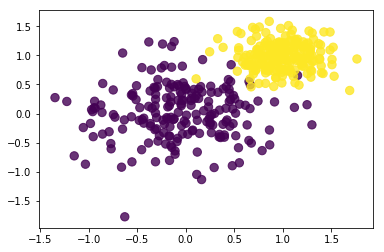

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot